<a href="https://colab.research.google.com/github/ayman86/playground/blob/tensor/eye_on_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!wget https://figshare.com/ndownloader/files/3381290
#!unzip 3381290


In [ ]:
import tensorflow.keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import random
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

INPUT_SHAPE = (224,224,3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.4))

model.add(Conv2D(filters=16, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 56, 56, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 64)       

In [ ]:
train  = '/content/drive/MyDrive/dtest/train'
test  = '/content/drive/MyDrive/dtest/val'

#Therd step resize
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
traindata = trdata.flow_from_directory(directory=train,target_size=(224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
testdata = tsdata.flow_from_directory(directory=test,target_size=(224,224))

model.compile(optimizer ='adam',loss = binary_crossentropy, metrics =['accuracy'])



Found 1260 images belonging to 2 classes.
Found 316 images belonging to 2 classes.


In [ ]:
hist = model.fit(traindata,steps_per_epoch = traindata.samples//32,
                 validation_data = testdata,
                 validation_steps = testdata.samples//32,
                 epochs = 10
                 )

Epoch 1/10
39/39 [==============================] - 46s 1s/step - loss: 0.6980 - accuracy: 0.4821 - val_loss: 0.6923 - val_accuracy: 0.6111
Epoch 2/10
39/39 [==============================] - 44s 1s/step - loss: 0.6918 - accuracy: 0.5358 - val_loss: 0.6854 - val_accuracy: 0.5625
Epoch 3/10
39/39 [==============================] - 45s 1s/step - loss: 0.6837 - accuracy: 0.5513 - val_loss: 0.6527 - val_accuracy: 0.6806
Epoch 4/10
39/39 [==============================] - 44s 1s/step - loss: 0.6905 - accuracy: 0.5334 - val_loss: 0.6820 - val_accuracy: 0.7153
Epoch 5/10
39/39 [==============================] - 42s 1s/step - loss: 0.6644 - accuracy: 0.6050 - val_loss: 0.6018 - val_accuracy: 0.7049
Epoch 6/10
39/39 [==============================] - 44s 1s/step - loss: 0.6535 - accuracy: 0.6360 - val_loss: 0.6037 - val_accuracy: 0.7083
Epoch 7/10
39/39 [==============================] - 42s 1s/step - loss: 0.6285 - accuracy: 0.6490 - val_loss: 0.5875 - val_accuracy: 0.7153
Epoch 8/10
39/39 [==

In [ ]:
score = model.evaluate(traindata, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5834746956825256
Test accuracy: 0.7309523820877075


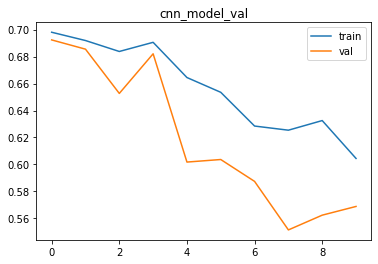

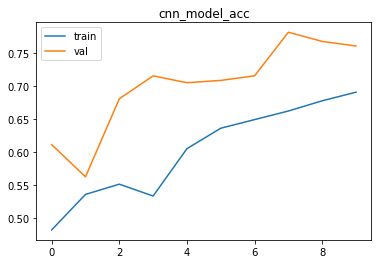

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


confusmatris
[[196 434]
 [199 431]]
classification_report
              precision    recall  f1-score   support

    abnormal       0.50      0.31      0.38       630
      normal       0.50      0.68      0.58       630

    accuracy                           0.50      1260
   macro avg       0.50      0.50      0.48      1260
weighted avg       0.50      0.50      0.48      1260



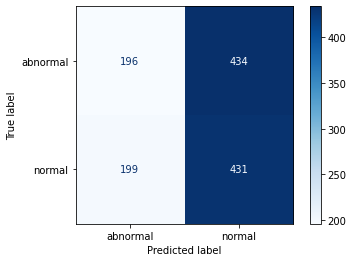

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('cnn_model_val')
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('cnn_model_acc')
plt.legend()
plt.show()

target = ['abnormal','normal']
label = [0,1]

Y_pred = model.predict_generator(traindata)
y_pred = np.argmax(Y_pred,axis=1)

cm = confusion_matrix(traindata.classes,y_pred,labels=label)

print ('confusmatris')
print (confusion_matrix(traindata.classes,y_pred))

print ('classification_report')
print (classification_report(traindata.classes,y_pred, target_names = target))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target)
disp = disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

In [ ]:
train  = '/content/drive/MyDrive/dtest/train'
test  = '/content/drive/MyDrive/dtest/val'

#Therd step resize
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
traindata = trdata.flow_from_directory(directory=train,target_size=(224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
testdata = tsdata.flow_from_directory(directory=test,target_size=(224,224))

input_shape = (224,224,3)

Found 1260 images belonging to 2 classes.
Found 316 images belonging to 2 classes.


In [ ]:
img_input = Input(shape=input_shape,name = 'img_input')

#conv_layer
l1 = Conv2D(32,(3,3),padding='same',activation='relu',name='l1')(img_input)
l1 = Conv2D(64,(3,3),padding='same',activation='relu',name='l2')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l3')(l1)
l1 = Dropout(0.2)(l1)

l1 = Conv2D(64,(3,3),padding='same',activation='relu',name='l4')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l5')(l1)
l1 = Dropout(0.3)(l1)

l1 = Conv2D(128,(3,3),padding='same',activation='relu',name='l6')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l7')(l1)
l1 = Dropout(0.4)(l1)

l1 = Conv2D(256,(3,3),padding='same',activation='relu',name='l8')(l1)
l1 = MaxPool2D((2,2),strides=(2,2),name='l9')(l1)
l1 = Dropout(0.5)(l1)

l1 = Flatten(name='fc1')(l1)
l1 = Dense(64,name='l10')(l1)
l1 = Dropout(0.5)(l1)

l1 = Dense(2,activation='sigmoid',name='predictions')(l1)

#Generate model
model = Model(inputs=img_input,outputs=l1,name='Binary_classification')
model.summary()

# compiling model
model.compile(optimizer ='adam',loss = binary_crossentropy, metrics =['accuracy'])
# start train & test
batch_size = 32

Model: "Binary_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 l1 (Conv2D)                 (None, 224, 224, 32)      896       
                                                                 
 l2 (Conv2D)                 (None, 224, 224, 64)      18496     
                                                                 
 l3 (MaxPooling2D)           (None, 112, 112, 64)      0         
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 l4 (Conv2D)                 (None, 112, 112, 64)      36928     
                                                                 
 l5 (MaxPooling2D)           (None, 56, 56, 6

In [ ]:
hist = model.fit(traindata,steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,
                 validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
39/39 [==============================] - 496s 13s/step - loss: 0.7528 - accuracy: 0.5855 - val_loss: 0.5690 - val_accuracy: 0.7222
Epoch 2/10
39/39 [==============================] - 424s 11s/step - loss: 0.5936 - accuracy: 0.7003 - val_loss: 0.6318 - val_accuracy: 0.5417
Epoch 3/10
39/39 [==============================] - 422s 11s/step - loss: 0.5425 - accuracy: 0.7484 - val_loss: 0.4681 - val_accuracy: 0.7812
Epoch 4/10
39/39 [==============================] - 434s 11s/step - loss: 0.4874 - accuracy: 0.7692 - val_loss: 0.4782 - val_accuracy: 0.7951
Epoch 5/10
39/39 [==============================] - 426s 11s/step - loss: 0.4801 - accuracy: 0.7761 - val_loss: 0.4807 - val_accuracy: 0.8056
Epoch 6/10
39/39 [==============================] - 425s 11s/step - loss: 0.4668 - accuracy: 0.7875 - val_loss: 0.4378 - val_accuracy: 0.7917
Epoch 7/10
39/39 [==============================] - 427s 11s/step - loss: 0.4758 - accuracy: 0.7720 - val_loss: 0.4233 - val_accuracy: 0.8021
Epoch 

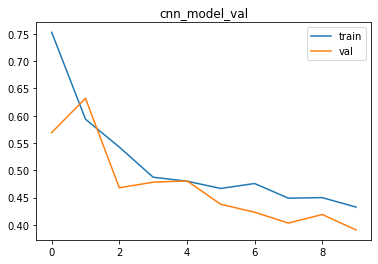

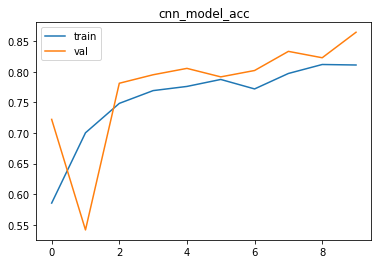

AttributeError: ignored

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('cnn_model_val')
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('cnn_model_acc')
plt.legend()
plt.show()

target = ['abnormal','normal']
label = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred,axis=1)

cm = confusion_matrix(testdata.classes,y_pred,labels=label)

print ('confusmatris')
print (confusion_matrix(testdata.classes,y_pred))

print ('classification_report')
print (classification_report(testdata.classes,y_pred, target_names = target))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target)
disp = disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

In [ ]:
pip install git+https://github.com/paulgavrikov/visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-3cfcq090
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-3cfcq090


In [ ]:
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

AttributeError: ignored

In [ ]:
def is_same_domain(host, pattern):
 """
 Return ``True`` if the host is either an exact match or a match
 to the wildcard pattern.

 Any pattern beginning with a period matches a domain and all of its
 subdomains. (e.g. ``.example.com`` matches ``example.com`` and
 ``foo.example.com``). Anything else is an exact string match.
 """
 if not pattern:
    return False

  pattern = pattern.lower()
  return (
     pattern[0] == '.' and (host.endswith(pattern) or host == pattern[1:]) 
   or
    pattern == host
  )

IndentationError: ignored

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import se
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16


In [ ]:
num_classes=2
image_size=224


In [ ]:
data_genarater=ImageDataGenerator(preprocessing_function=preprocess_input)

NameError: ignored

In [ ]:
train  = '/content/drive/MyDrive/dtest/train'
test  = '/content/drive/MyDrive/dtest/val'
#Therd step resize
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
testdata = tsdata.flow_from_directory(directory=test,target_size=(224,224))

input_shape = (224,224,3)

Found 1260 images belonging to 2 classes.
Found 316 images belonging to 2 classes.


In [ ]:
from keras.utils.traceback_utils import include_frame
model=Sequential()
model.add(VGG16(include_top=False,pooling='avg',weights='imagenet'))


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].trainable=False
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_per_epoch_train=len(traindata)
step_per_epoch_vaild=len(testdata)
num_epoch=2


In [ ]:
pach_size_train=32
pach_size_valid=32

hist = model.fit_generator(traindata,
                           steps_per_epoch = pach_size_train,
                           epochs = 10,
                           validation_data = testdata,
                           validation_steps =pach_size_valid
                           )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.6345 

32/32 [==============================] - 733s 23s/step - loss: 0.6688 - accuracy: 0.6345 - val_loss: 0.6687 - val_accuracy: 0.6044
Epoch 2/10
32/32 [==============================] - 525s 16s/step - loss: 0.6650 - accuracy: 0.6424
Epoch 3/10
32/32 [==============================] - 534s 17s/step - loss: 0.6565 - accuracy: 0.6445
Epoch 4/10
32/32 [==============================] - 523s 16s/step - loss: 0.6502 - accuracy: 0.6743
Epoch 5/10
32/32 [==============================] - 533s 17s/step - loss: 0.6457 - accuracy: 0.6733
Epoch 6/10
32/32 [==============================] - 529s 16s/step - loss: 0.6388 - accuracy: 0.6853
Epoch 7/10
26/32 [=======================>......] - ETA: 1:38 - loss: 0.6415 - accuracy: 0.6466

In [ ]:
model.save('/content/drive/MyDrive/Mdvdata/model_saved.h5')


NameError: ignored

In [ ]:
model.save_spec('/content/drive/MyDrive/Mdvdata/model_saved.h5')

([TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='vgg16_input')],
 {})

In [ ]:
model.save_weights('/content/drive/MyDrive/Mdvdata/model_saved.h5')

In [ ]:
import tensorflow

from tensorflow import keras
from keras.models import load_model
model = load_model('model_saved.h5')

OSError: ignored

In [ ]:
test_genrator= traindata.flow_from_directory('/content/drive/MyDrive/Mdvdata/test',
                                             target_size=(image_size,image_size),
                                             shuffle=False
                                             )
step_per_epoch_vaild=len(testdata)


In [ ]:
test_score=vgg16_saved.evaluate_generator(test_genrator,step_per_epoch_vaild,verbose=1)
